# Neural network model

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.subplots as sp
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
import plotly.offline as pyo


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# Load the dataset
df = pd.read_csv('cleaneddf.csv')
df.skew()


C:\Users\Xinyang\AppData\Local\Temp\ipykernel_18568\1125664264.py:17: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Unnamed: 0.1        -0.072780
Unnamed: 0          -0.072780
Danceability        -0.338371
Energy              -0.465835
Key                 -0.015416
Loudness            -1.241317
Speechiness          1.546030
Acousticness         0.860787
Instrumentalness     3.712763
Liveness             1.121624
Valence             -0.055612
Tempo                0.444058
Duration_ms          1.253307
Views                8.937788
Likes                8.595520
Comments            38.976588
Licensed            -1.045321
official_video      -1.545918
Stream               3.908570
dtype: float64

Note: you may need to restart the kernel to use updated packages.
Epoch 1/100
240/240 [==============================] - 1s 3ms/step - loss: 38339854496432128.0000 - mse: 38339854496432128.0000 - mae: 37882792.0000 - val_loss: 35301721332776960.0000 - val_mse: 35301721332776960.0000 - val_mae: 37811876.0000
Epoch 2/100


240/240 [==============================] - 0s 2ms/step - loss: 38337934646050816.0000 - mse: 38337934646050816.0000 - mae: 37872212.0000 - val_loss: 35296711253426176.0000 - val_mse: 35296711253426176.0000 - val_mae: 37787668.0000
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 38324834995798016.0000 - mse: 38324834995798016.0000 - mae: 37825276.0000 - val_loss: 35273597886922752.0000 - val_mse: 35273597886922752.0000 - val_mae: 37715864.0000
Epoch 4/100
240/240 [==============================] - 0s 2ms/step - loss: 38279922522783744.0000 - mse: 38279922522783744.0000 - mae: 37721864.0000 - val_loss: 35210240676855808.0000 - val_mse: 35210240676855808.0000 - val_mae: 37595244.0000
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 38183887054045184.0000 - mse: 38183887054045184.0000 - mae: 37552308.0000 - val_loss: 35093565742776320.0000 - val_mse: 35093565742776320.0000 - val_mae: 37388136.0000
Epoch 6/100
240/240 [===================

Epoch 36/100
240/240 [==============================] - 1s 2ms/step - loss: 33847331589718016.0000 - mse: 33847331589718016.0000 - mae: 45472212.0000 - val_loss: 31089421419806720.0000 - val_mse: 31089421419806720.0000 - val_mae: 45905068.0000
Epoch 37/100
240/240 [==============================] - 1s 2ms/step - loss: 33940349843931136.0000 - mse: 33940349843931136.0000 - mae: 45679296.0000 - val_loss: 31073585875386368.0000 - val_mse: 31073585875386368.0000 - val_mae: 45954928.0000
Epoch 38/100
240/240 [==============================] - 1s 2ms/step - loss: 33909623647895552.0000 - mse: 33909623647895552.0000 - mae: 45687428.0000 - val_loss: 31061005916176384.0000 - val_mse: 31061005916176384.0000 - val_mae: 46020848.0000
Epoch 39/100
240/240 [==============================] - 1s 2ms/step - loss: 33923977428598784.0000 - mse: 33923977428598784.0000 - mae: 45819944.0000 - val_loss: 31050137501433856.0000 - val_mse: 31050137501433856.0000 - val_mae: 46035736.0000
Epoch 40/100
240/240 [==

240/240 [==============================] - 1s 2ms/step - loss: 33823088646815744.0000 - mse: 33823088646815744.0000 - mae: 46579944.0000 - val_loss: 30929622866591744.0000 - val_mse: 30929622866591744.0000 - val_mae: 46793500.0000
Epoch 70/100
240/240 [==============================] - 1s 2ms/step - loss: 33755745707098112.0000 - mse: 33755745707098112.0000 - mae: 46454540.0000 - val_loss: 30928330081435648.0000 - val_mse: 30928330081435648.0000 - val_mae: 46835472.0000
Epoch 71/100
240/240 [==============================] - 0s 2ms/step - loss: 33791647338725376.0000 - mse: 33791647338725376.0000 - mae: 46405884.0000 - val_loss: 30927200505036800.0000 - val_mse: 30927200505036800.0000 - val_mae: 46811056.0000
Epoch 72/100
240/240 [==============================] - 1s 2ms/step - loss: 33741673246752768.0000 - mse: 33741673246752768.0000 - mae: 46549328.0000 - val_loss: 30926760270888960.0000 - val_mse: 30926760270888960.0000 - val_mae: 46891816.0000
Epoch 73/100
240/240 [===============

C:\Users\Xinyang\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



75/75 [==============================] - 0s 942us/step
Test loss: 2.728456357937152e+16
Test mean squared error: 2.728456357937152e+16
Test mean absolute error: 44969376.0
Test explained variance: 0.007524372541681405
Predictions: [[2.9490821e+10 3.4471088e+07 2.2271435e+08]]


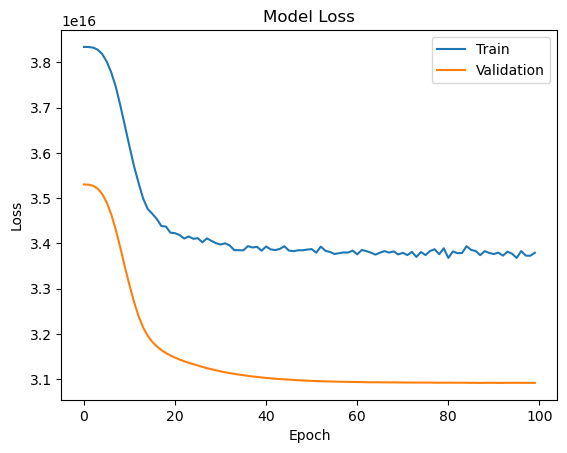

R-squared: -0.058256867244613986
Mean absolute percentage error: Views       1.626201e+05
Comments             inf
Likes       3.418453e+04
dtype: float64
Root mean squared error: 165180382.32395783
Explained variance score: 0.007524372541681405


C:\Users\Xinyang\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3430: FutureWarning:

In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'



In [9]:
%pip install tensorflow
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Split into features and target

X = df[['Danceability', 'Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo']]  # First 8 columns are features
y = df[['Views','Comments','Likes']]  # Last 3 columns are targets

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(8,), activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='linear')
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_mse, test_mae = model.evaluate(X_test, y_test)

# Make predictions on new data
new_data = np.array([[0.7, 0.5, 0.1, 0.8, 0.9, 0.2, 0.6, 120.0]])
new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)
y_pred = model.predict(X_test)
test_exp_var = explained_variance_score(y_test, y_pred)

# Output the test metrics and predictions
print("Test loss:", test_loss)
print("Test mean squared error:", test_mse)
print("Test mean absolute error:", test_mae)
print("Test explained variance:", test_exp_var)
print("Predictions:", predictions)

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Calculate and output additional evaluation metrics

print("R-squared:", r2_score(y_test, y_pred))
print("Mean absolute percentage error:", np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
print("Root mean squared error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Explained variance score:", explained_variance_score(y_test, y_pred))

### The results shows the model that was trained for a regression problem, where the goal is to predict a continuous value. The "Test mean squared error" and "Test mean absolute error" are two metrics that are used to evaluate the performance of the model, and in  this case, both of these metrics are very large, suggesting that the model is not performing well on the test data. The "Test loss" is another metric that indicates the overall error of the model on the test data, and it is also very large in this case. The "Predictions" are the output of the model for a specific input sample, and in this case, it includes three continuous values that may be the output of a multi-output regression model. Overall, the results suggest that the model needs further tuning or improvement to perform better on the test data.